# Proyek Machine Learning - Analisis Performa Akademik Siswa
Notebook ini dibuat untuk memprediksi kelulusan siswa berdasarkan fitur demografis dan sosial, serta memahami fitur mana yang paling berpengaruh terhadap performa akademik siswa. Dataset diambil dari Kaggle: [Students Performance](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

## Domain Proyek
Masalah dalam dunia pendidikan adalah bagaimana memanfaatkan data untuk meningkatkan hasil belajar. Tujuan proyek ini adalah untuk membantu pihak pendidikan memahami karakteristik siswa yang berpengaruh terhadap kelulusan dan performa akademik.

## Business Understanding
### Problem Statements
1. Bagaimana cara memprediksi apakah seorang siswa akan lulus mata pelajaran matematika, membaca, dan menulis?
2. Fitur demografis dan sosial apa yang paling memengaruhi performa akademik siswa?

### Goals
1. Mengembangkan model klasifikasi untuk memprediksi kelulusan siswa pada tiga mata pelajaran utama.
2. Mengidentifikasi fitur-fitur yang paling memengaruhi nilai siswa dengan pendekatan regresi.

### Solution Statements
- Menggunakan Logistic Regression untuk klasifikasi kelulusan siswa.
- Menggunakan Linear Regression untuk prediksi nilai dan pentingnya fitur.
- Evaluasi menggunakan metrik yang sesuai seperti Accuracy dan RMSE.

## Data Understanding
Sumber data: [Kaggle - Students Performance](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

- Jumlah data: 1000 baris, 8 kolom
- Tidak ada missing values atau duplikat
- Fitur:
  - gender
  - race/ethnicity
  - parental level of education
  - lunch
  - test preparation course
  - math score, reading score, writing score

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Visualisasi Distribusi Fitur Numerikal

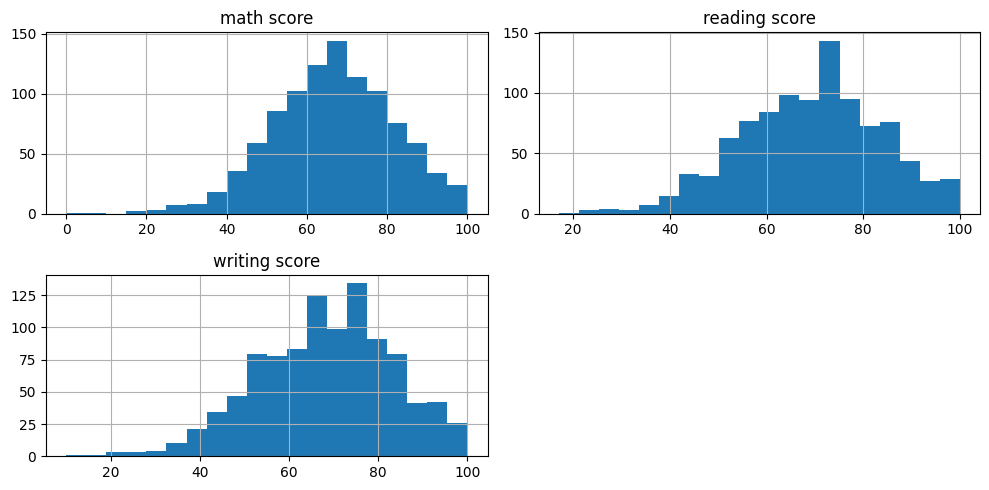

In [2]:
numeric_cols = ['math score', 'reading score', 'writing score']
df[numeric_cols].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()


### Visualisasi Fitur Kategorikal

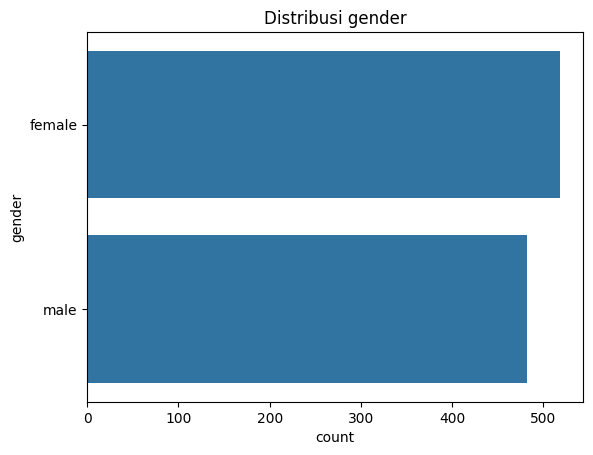

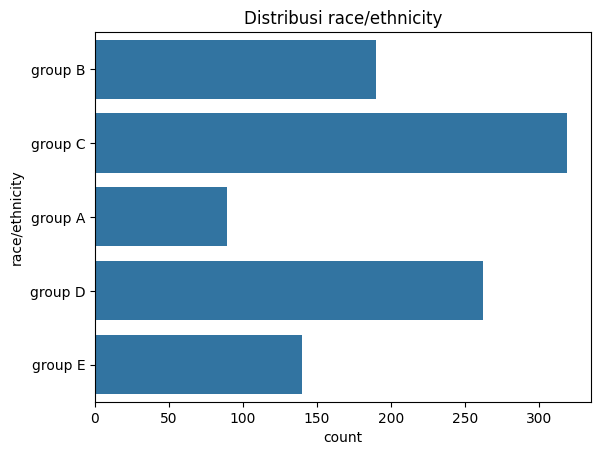

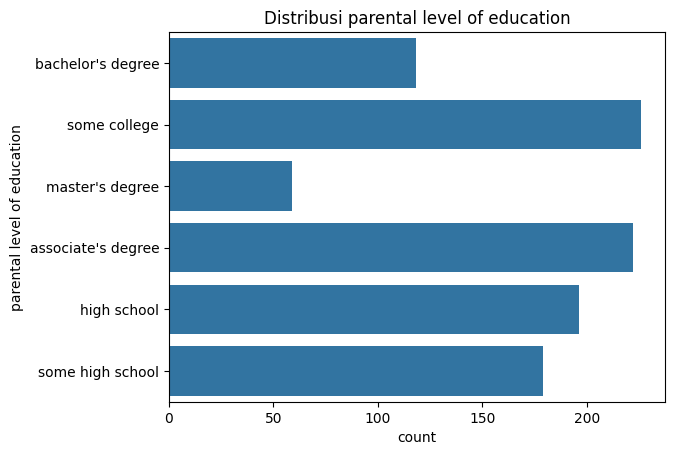

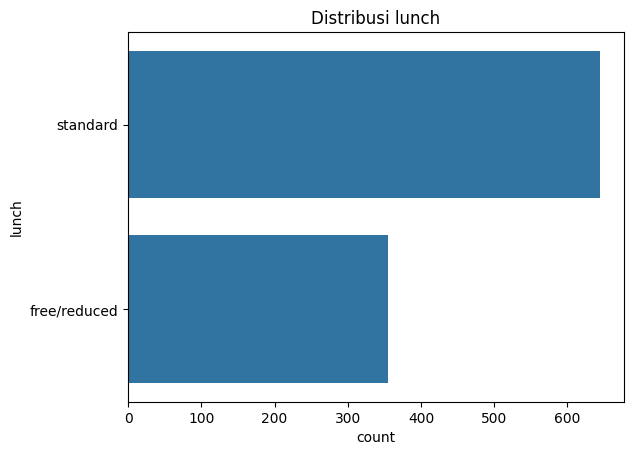

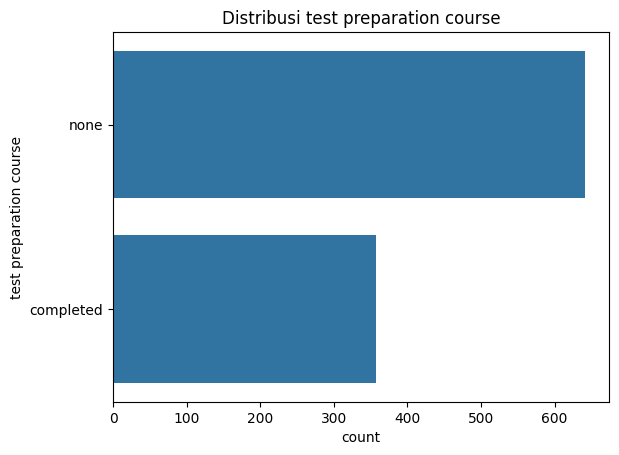

In [3]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    sns.countplot(y=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.show()


## Data Preparation
- Label encoding pada kolom kategorikal
- Menambahkan kolom target kelulusan (nilai >= 65 dianggap lulus)
- Membagi data menjadi train-test set

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Buat label kelulusan
df['math_pass'] = (df['math score'] >= 65).astype(int)
df['reading_pass'] = (df['reading score'] >= 65).astype(int)
df['writing_pass'] = (df['writing score'] >= 65).astype(int)

df_encoded = pd.get_dummies(df.drop(columns=['math score', 'reading score', 'writing score']))

X = df_encoded.drop(columns=['math_pass', 'reading_pass', 'writing_pass'])
y_math = df_encoded['math_pass']
X_train, X_test, y_train, y_test = train_test_split(X, y_math, test_size=0.2, random_state=42)


## Modeling
### Logistic Regression (Klasifikasi)
Memprediksi apakah siswa lulus berdasarkan fitur input.

### Linear Regression (Regresi)
Untuk mengetahui fitur yang paling mempengaruhi nilai akhir siswa.

In [5]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Linear Regression
y_score = df['math score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_score, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)


## Evaluation
### Klasifikasi
Metrik: Accuracy, Precision, Recall, F1-score

### Regresi
Metrik: RMSE

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt

print("=== Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\n=== Regression ===")
rmse = sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE:", rmse)


=== Classification ===
Accuracy: 0.66
Precision: 0.6507936507936508
Recall: 0.7735849056603774
F1 Score: 0.7068965517241379

=== Regression ===
RMSE: 14.160185226319358
